In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"C:\Users\Shiva Sai\Desktop\ML2\Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
print("Initial shape:", df.shape)

Initial shape: (541909, 8)


In [9]:
#Missing IDs mean we can’t track the customer
df = df.dropna(subset=['CustomerID'])

In [10]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
import datetime as dt 

# Reference date = last date in dataset
ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Compute recency per customer
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (ref_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID', 'Recency']]


In [13]:
frequency = df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index() #Count unique invoices per customer
frequency.columns = ['CustomerID', 'Frequency']

In [14]:
monetary = df.groupby('CustomerID')['TotalAmount'].sum().reset_index() #Sum of all spending per customer
monetary.columns = ['CustomerID', 'Monetary']


In [15]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [16]:
data=df.copy()

In [17]:

data = data.dropna(subset=['CustomerID'])
data = data.drop_duplicates()


In [18]:
# Convert InvoiceDate
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract year-month for trend analysis
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')


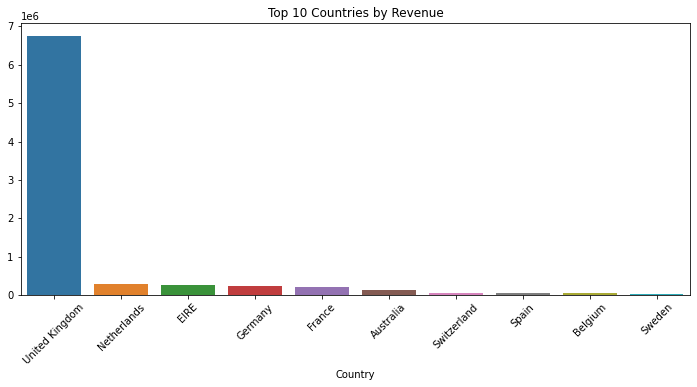

In [19]:

country_sales = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45)
plt.show()


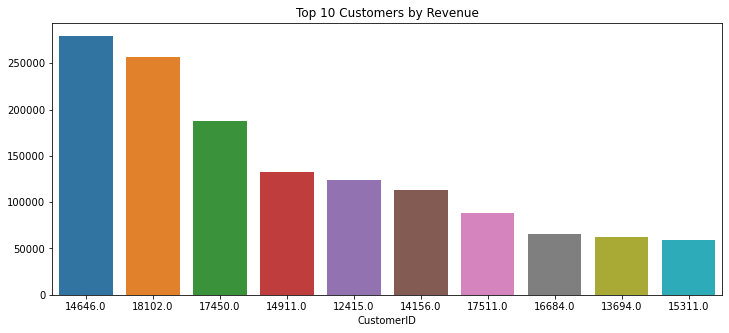

In [20]:
top_customers = data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 10 Customers by Revenue")
plt.show()


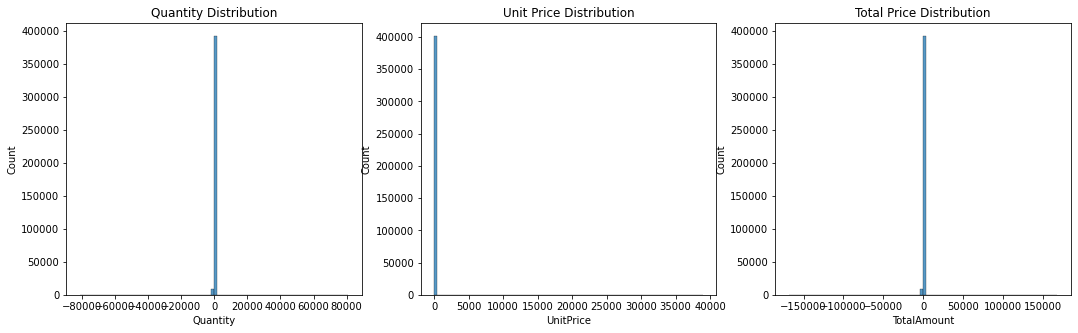

In [21]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

sns.histplot(data['Quantity'], bins=100, ax=ax[0], kde=False)
ax[0].set_title("Quantity Distribution")

sns.histplot(data['UnitPrice'], bins=100, ax=ax[1], kde=False)
ax[1].set_title("Unit Price Distribution")

sns.histplot(data['TotalAmount'], bins=100, ax=ax[2], kde=False)
ax[2].set_title("Total Price Distribution")

plt.show()


In [22]:
# Latest date in dataset
latest_date = data['InvoiceDate'].max()

# RFM table
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                # Frequency
    'TotalAmount': 'sum'                                    # Monetary
})

rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetary'}, inplace=True)


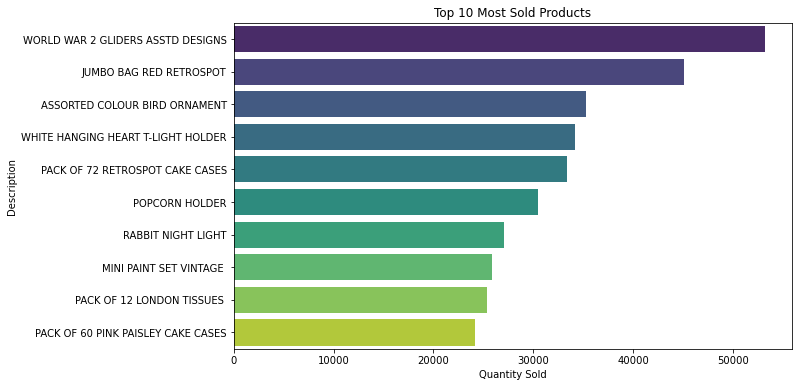

In [23]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.show()

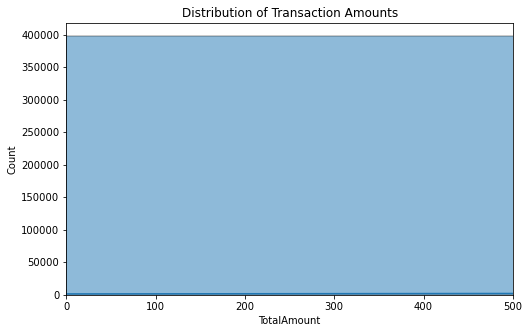

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['TotalAmount'], bins=100, kde=True)
plt.xlim(0, 500)  # remove extreme outliers
plt.title("Distribution of Transaction Amounts")
plt.show()

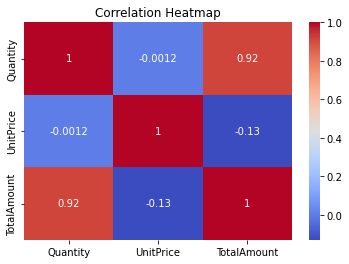

In [25]:
corr = df[['Quantity', 'UnitPrice', 'TotalAmount']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

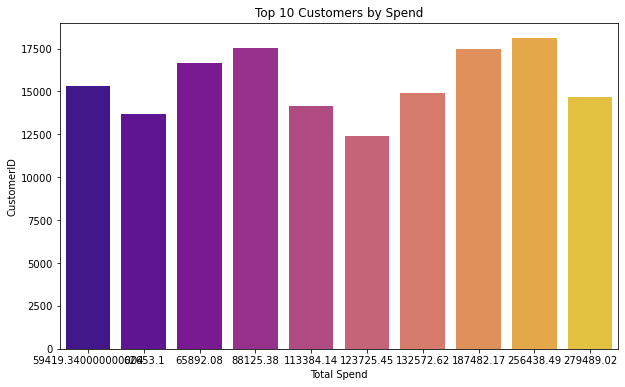

In [26]:
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="plasma")
plt.title("Top 10 Customers by Spend")
plt.xlabel("Total Spend")
plt.show()

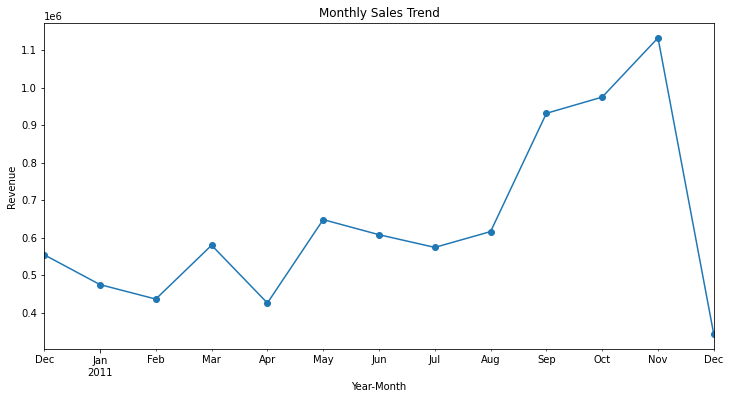

In [27]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalAmount'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Year-Month")
plt.show()

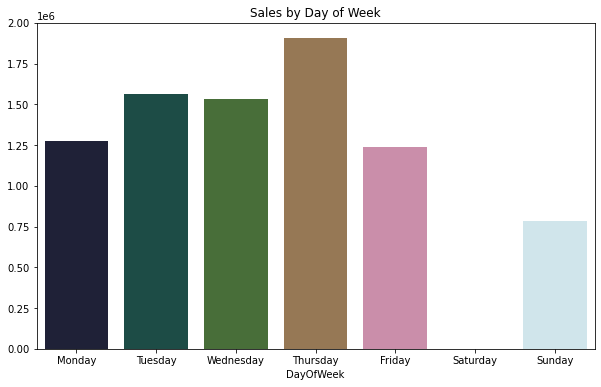

In [28]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
day_sales = df.groupby('DayOfWeek')['TotalAmount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(10,6))
sns.barplot(x=day_sales.index, y=day_sales.values, palette="cubehelix")
plt.title("Sales by Day of Week")
plt.show()

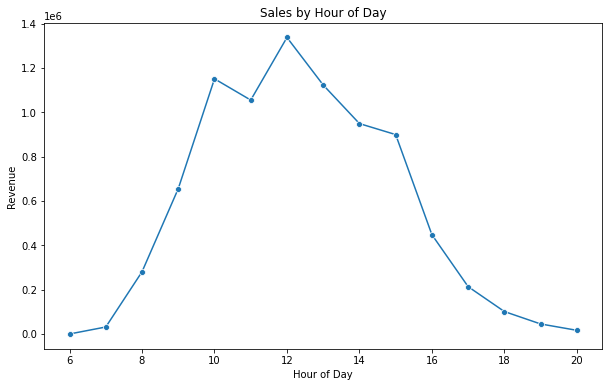

In [29]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['TotalAmount'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title("Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.show()

In [30]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 5225


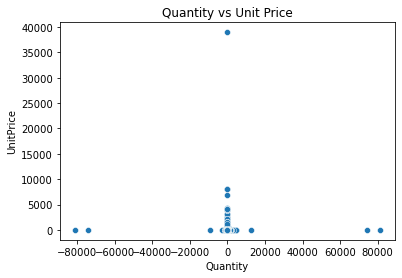

In [31]:
# Quantity vs UnitPrice
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title("Quantity vs Unit Price")
plt.show()


In [32]:
import datetime as dt

# Reference date (last date in dataset)
ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'Country': 'first'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgPrice'
}, inplace=True)

rfm['Monetary'] = df.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())


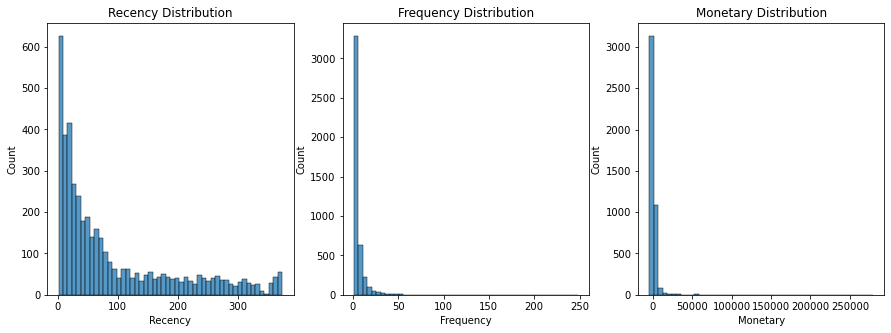

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm['Recency'], bins=50, ax=axes[0])
axes[0].set_title("Recency Distribution")

sns.histplot(rfm['Frequency'], bins=50, ax=axes[1])
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm['Monetary'], bins=50, ax=axes[2])
axes[2].set_title("Monetary Distribution")

plt.show()


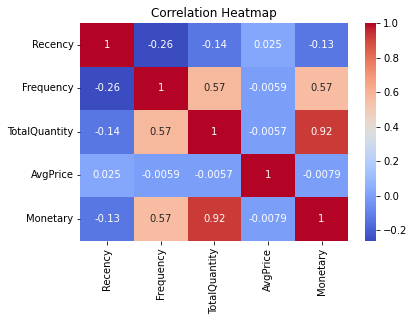

In [34]:
sns.heatmap(rfm.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


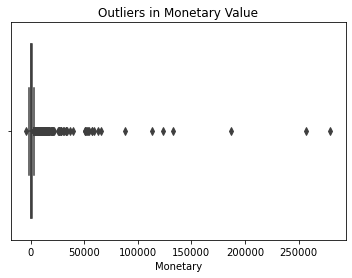

In [35]:
sns.boxplot(rfm['Monetary'])
plt.title("Outliers in Monetary Value")
plt.show()


In [36]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [37]:
rfm = pd.DataFrame({
    'Recency': np.random.randint(1, 365, 500),
    'Frequency': np.random.randint(1, 50, 500),
    'Monetary': np.random.randint(10, 2000, 500)
})

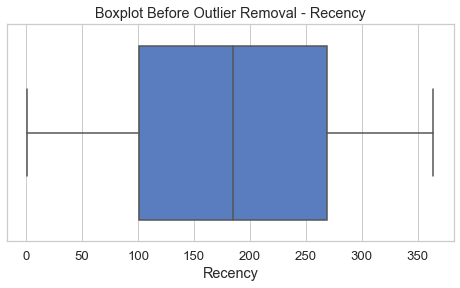

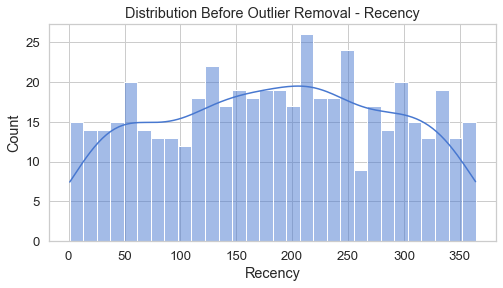

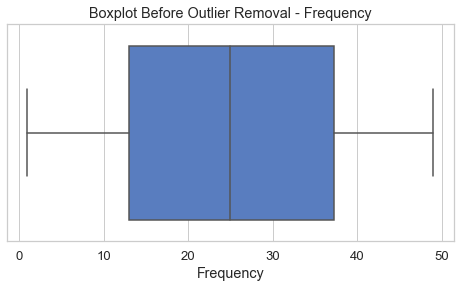

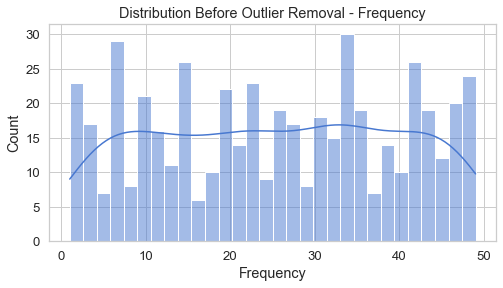

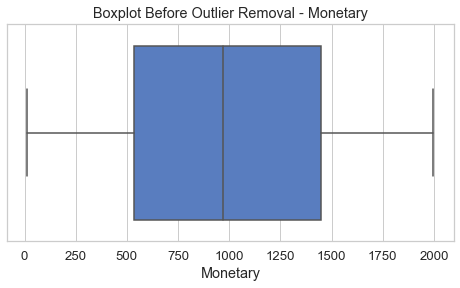

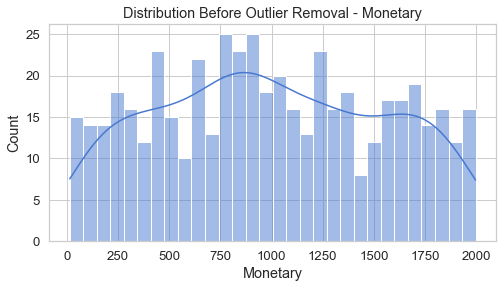

In [38]:
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=rfm[col])
    plt.title(f"Boxplot Before Outlier Removal - {col}")
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(rfm[col], bins=30, kde=True)
    plt.title(f"Distribution Before Outlier Removal - {col}")
    plt.show()

In [39]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers, lower, upper

In [40]:
for col in ['Recency', 'Frequency', 'Monetary']:
    outliers, lower, upper = detect_outliers_iqr(rfm, col)
    print(f"{col}: {len(outliers)} outliers found")
    print(f"Lower bound = {lower:.2f}, Upper bound = {upper:.2f}")
    print("-"*50)

Recency: 0 outliers found
Lower bound = -151.00, Upper bound = 521.00
--------------------------------------------------
Frequency: 0 outliers found
Lower bound = -23.38, Upper bound = 73.62
--------------------------------------------------
Monetary: 0 outliers found
Lower bound = -831.25, Upper bound = 2816.75
--------------------------------------------------


In [41]:
rfm_removed = rfm.copy()
for col in ['Recency', 'Frequency', 'Monetary']:
    outliers, lower, upper = detect_outliers_iqr(rfm_removed, col)
    rfm_removed = rfm_removed[(rfm_removed[col] >= lower) & (rfm_removed[col] <= upper)]

print(f"Original Data Size: {rfm.shape[0]} | After Removal: {rfm_removed.shape[0]}")

Original Data Size: 500 | After Removal: 500


In [42]:
rfm_capped = rfm.copy()
for col in ['Recency', 'Frequency', 'Monetary']:
    outliers, lower, upper = detect_outliers_iqr(rfm_capped, col)
    rfm_capped[col] = np.where(rfm_capped[col] > upper, upper,
                               np.where(rfm_capped[col] < lower, lower, rfm_capped[col]))

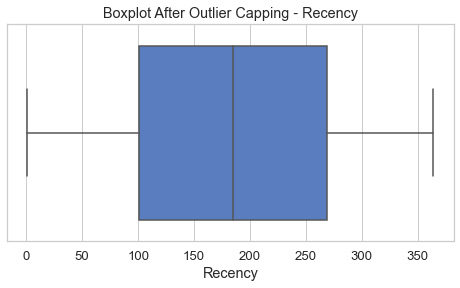

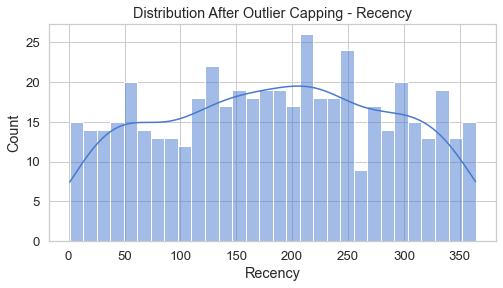

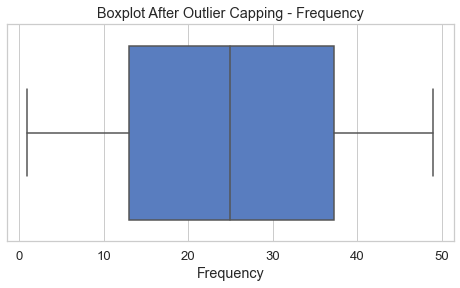

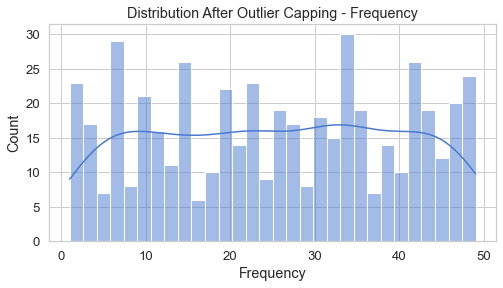

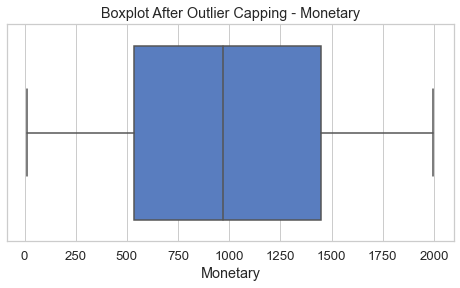

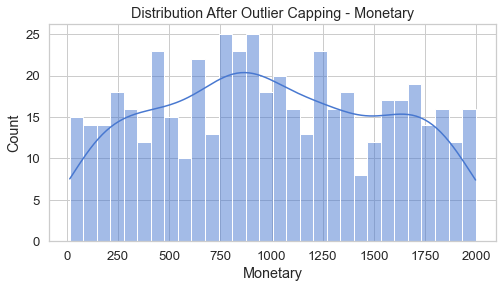

In [43]:
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=rfm_capped[col])
    plt.title(f"Boxplot After Outlier Capping - {col}")
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(rfm_capped[col], bins=30, kde=True)
    plt.title(f"Distribution After Outlier Capping - {col}")
    plt.show()


In [44]:
print("Summary Statistics Before Cleaning")
print(rfm[['Recency','Frequency','Monetary']].describe())
print("\nSummary Statistics After Cleaning (Capped)")
print(rfm_capped[['Recency','Frequency','Monetary']].describe())

Summary Statistics Before Cleaning
          Recency   Frequency     Monetary
count  500.000000  500.000000   500.000000
mean   184.448000   25.316000   993.748000
std    100.699832   14.338596   550.294187
min      1.000000    1.000000    14.000000
25%    101.000000   13.000000   536.750000
50%    185.000000   25.000000   968.000000
75%    269.000000   37.250000  1448.750000
max    364.000000   49.000000  1997.000000

Summary Statistics After Cleaning (Capped)
          Recency   Frequency     Monetary
count  500.000000  500.000000   500.000000
mean   184.448000   25.316000   993.748000
std    100.699832   14.338596   550.294187
min      1.000000    1.000000    14.000000
25%    101.000000   13.000000   536.750000
50%    185.000000   25.000000   968.000000
75%    269.000000   37.250000  1448.750000
max    364.000000   49.000000  1997.000000


In [45]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

In [46]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [47]:
outliers_price = detect_outliers_iqr(df, 'UnitPrice')
print("Outliers in UnitPrice:", outliers_price.shape[0])

Outliers in UnitPrice: 35802


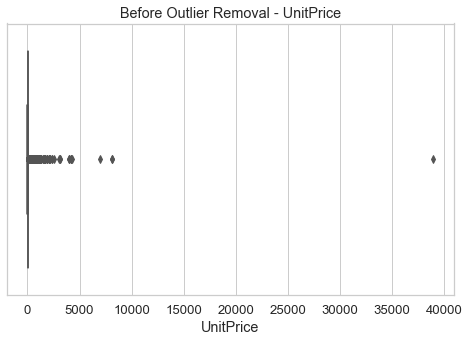

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['UnitPrice'])
plt.title("Before Outlier Removal - UnitPrice")
plt.show()

# Remove and check again
df = remove_outliers_iqr(df, 'UnitPrice')

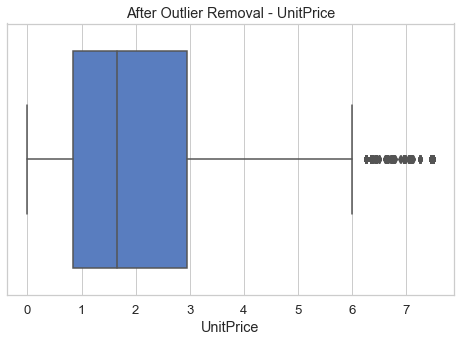

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['UnitPrice'])
plt.title("After Outlier Removal - UnitPrice")
plt.show()

In [50]:
outliers_total = detect_outliers_iqr(df, 'TotalAmount')
print("Outliers in TotalPrice:", outliers_total.shape[0])

Outliers in TotalPrice: 32451


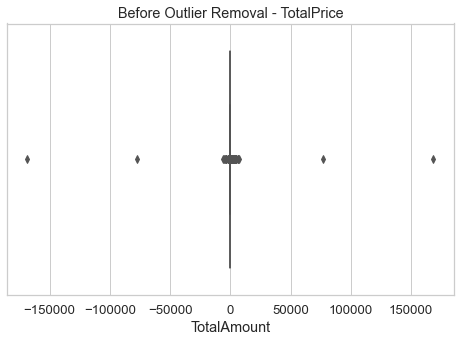

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['TotalAmount'])
plt.title("Before Outlier Removal - TotalPrice")
plt.show()

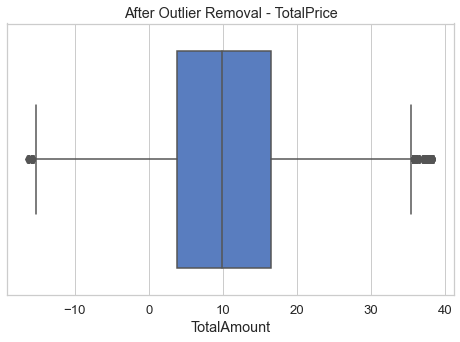

In [52]:
df = remove_outliers_iqr(df, 'TotalAmount')

plt.figure(figsize=(8,5))
sns.boxplot(x=df['TotalAmount'])
plt.title("After Outlier Removal - TotalPrice")
plt.show()

In [53]:
df.shape

(333351, 12)

Feature Engineering (RFM)

In [54]:
import datetime as dt

NOW = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (NOW - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID','Recency','Frequency','Monetary']


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])


In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Scale RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

results = {}

# --- 1. KMeans ---
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(rfm_scaled)

results['KMeans'] = {
    'Silhouette': silhouette_score(rfm_scaled, labels_kmeans),
    'Davies-Bouldin': davies_bouldin_score(rfm_scaled, labels_kmeans),
    'Calinski-Harabasz': calinski_harabasz_score(rfm_scaled, labels_kmeans)
}

# --- 2. Hierarchical Clustering ---
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_hc = hc.fit_predict(rfm_scaled)

results['Hierarchical'] = {
    'Silhouette': silhouette_score(rfm_scaled, labels_hc),
    'Davies-Bouldin': davies_bouldin_score(rfm_scaled, labels_hc),
    'Calinski-Harabasz': calinski_harabasz_score(rfm_scaled, labels_hc)
}

# --- 3. Gaussian Mixture Model (GMM) ---
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(rfm_scaled)

results['GMM'] = {
    'Silhouette': silhouette_score(rfm_scaled, labels_gmm),
    'Davies-Bouldin': davies_bouldin_score(rfm_scaled, labels_gmm),
    'Calinski-Harabasz': calinski_harabasz_score(rfm_scaled, labels_gmm)
}

# --- Print results ---
results_df = pd.DataFrame(results).T
print(results_df)


              Silhouette  Davies-Bouldin  Calinski-Harabasz
KMeans          0.588552        0.612679        4119.001679
Hierarchical    0.548474        0.629885        3782.074709
GMM             0.066571        2.122775         680.203535


In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Store in DataFrame for easy plotting
pca_df = pd.DataFrame(rfm_pca, columns=['PC1','PC2'])


In [58]:
pca_df['KMeans'] = labels_kmeans
pca_df['Hierarchical'] = labels_hc
pca_df['GMM'] = labels_gmm


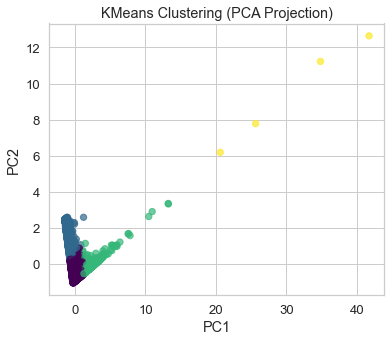

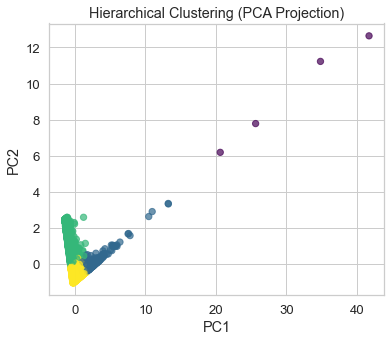

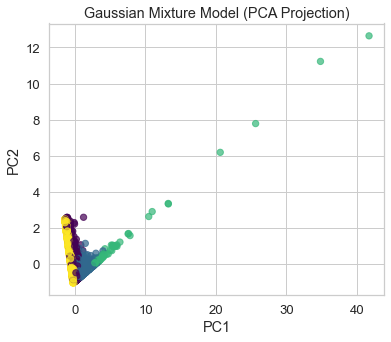

In [59]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(6,5))
    plt.scatter(data['PC1'], data['PC2'], c=labels, cmap='viridis', s=40, alpha=0.7)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# Plot for each algorithm
plot_clusters(pca_df, pca_df['KMeans'], "KMeans Clustering (PCA Projection)")
plot_clusters(pca_df, pca_df['Hierarchical'], "Hierarchical Clustering (PCA Projection)")
plot_clusters(pca_df, pca_df['GMM'], "Gaussian Mixture Model (PCA Projection)")


Cluster Profiling (Mean RFM per Cluster):
   Cluster    CustomerID     Recency   Frequency     Monetary
0        0  15347.369565   85.864656   56.563815   685.470927
1        1  15369.992849   22.138260  182.030989  1945.297604
2        2  15377.437500    6.862500  915.500000  7436.268125
3        3  15218.877031  132.889491   14.478332   231.206485


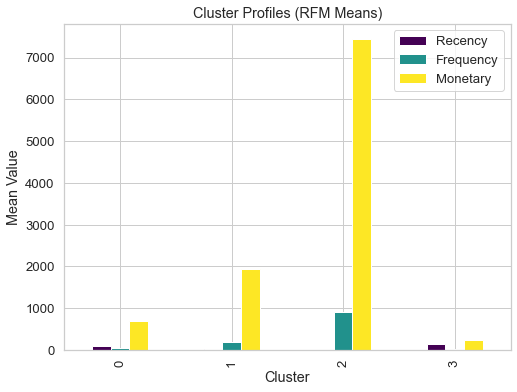

In [60]:
# ============================
# 12. Cluster Profiling
# ============================

# Add GMM cluster labels back to original RFM dataset
rfm['Cluster'] = labels_gmm

# Calculate mean values for each cluster
cluster_profile = rfm.groupby('Cluster').mean().reset_index()

print("Cluster Profiling (Mean RFM per Cluster):")
print(cluster_profile)

# Visualize cluster profiles
cluster_profile.set_index('Cluster')[['Recency','Frequency','Monetary']].plot(
    kind='bar',
    figsize=(8,6),
    colormap='viridis'
)
plt.title("Cluster Profiles (RFM Means)")
plt.ylabel("Mean Value")
plt.show()


Cluster Sizes:
 0    1426
1     839
2      80
3    1846
Name: Cluster, dtype: int64


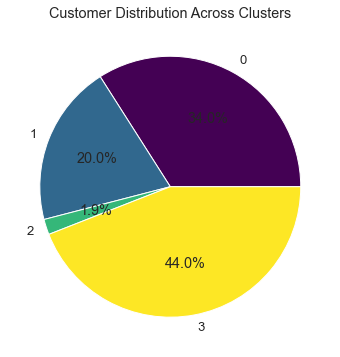

In [61]:
# ============================
# 13. Cluster Size Distribution
# ============================
cluster_counts = rfm['Cluster'].value_counts().sort_index()
print("Cluster Sizes:\n", cluster_counts)

cluster_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colormap='viridis')
plt.title("Customer Distribution Across Clusters")
plt.ylabel("")
plt.show()


In [62]:
from sklearn.preprocessing import StandardScaler

# Select features
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [63]:
# ============================
# 12. Evaluation Metrics
# ============================
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate scores for each clustering method
scores = {
    "KMeans": {
        "Silhouette": silhouette_score(X_scaled, labels_kmeans),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, labels_kmeans),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels_kmeans),
    },
    "Hierarchical": {
        "Silhouette": silhouette_score(X_scaled, labels_hc),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, labels_hc),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels_hc),
    },
    "GMM": {
        "Silhouette": silhouette_score(X_scaled, labels_gmm),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, labels_gmm),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels_gmm),
    }
}

print("=== Clustering Evaluation Metrics ===")
for method, vals in scores.items():
    print(f"\n{method} Clustering:")
    for metric, value in vals.items():
        print(f"  {metric}: {value:.4f}")


=== Clustering Evaluation Metrics ===

KMeans Clustering:
  Silhouette: 0.5886
  Davies-Bouldin: 0.6127
  Calinski-Harabasz: 4119.0017

Hierarchical Clustering:
  Silhouette: 0.5485
  Davies-Bouldin: 0.6299
  Calinski-Harabasz: 3782.0747

GMM Clustering:
  Silhouette: 0.0666
  Davies-Bouldin: 2.1228
  Calinski-Harabasz: 680.2035



=== Cluster Profiling (Mean RFM per Cluster) ===
   Cluster    CustomerID     Recency   Frequency     Monetary
0        0  15347.369565   85.864656   56.563815   685.470927
1        1  15369.992849   22.138260  182.030989  1945.297604
2        2  15377.437500    6.862500  915.500000  7436.268125
3        3  15218.877031  132.889491   14.478332   231.206485


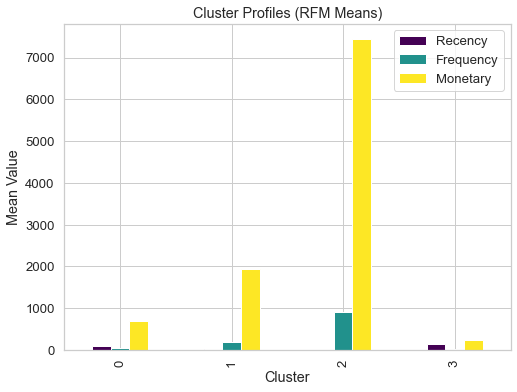

In [64]:
# ============================
# 13. Cluster Profiling
# ============================
# Add GMM cluster labels back to RFM dataset
rfm['Cluster'] = labels_gmm

# Calculate mean values per cluster
cluster_profile = rfm.groupby('Cluster').mean().reset_index()

print("\n=== Cluster Profiling (Mean RFM per Cluster) ===")
print(cluster_profile)

# Visualize cluster profiles
cluster_profile.set_index('Cluster')[['Recency','Frequency','Monetary']].plot(
    kind='bar',
    figsize=(8,6),
    colormap='viridis'
)
plt.title("Cluster Profiles (RFM Means)")
plt.ylabel("Mean Value")
plt.show()



=== Cluster Sizes ===
0    1426
1     839
2      80
3    1846
Name: Cluster, dtype: int64


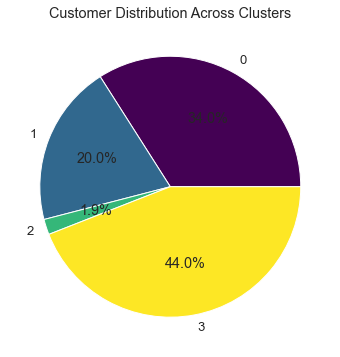

In [65]:
# ============================
# 14. Cluster Size Distribution
# ============================
cluster_counts = rfm['Cluster'].value_counts().sort_index()
print("\n=== Cluster Sizes ===")
print(cluster_counts)

# Pie chart
cluster_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    colormap='viridis'
)
plt.title("Customer Distribution Across Clusters")
plt.ylabel("")
plt.show()

In [66]:
# Step 3: Create RFM Scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])  # lower recency = better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine into RFM Score
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(int) + 
    rfm['F_Score'].astype(int) + 
    rfm['M_Score'].astype(int)
)

def segment_me(row):
    # Top customers across all 3 metrics
    if row['R_Score'] == 4 and row['F_Score'] == 4 and row['M_Score'] == 4:
        return 'Champions'
    # High frequency and monetary, but not most recent
    elif row['F_Score'] >= 3 and row['M_Score'] >= 3 and row['R_Score'] >= 2:
        return 'Loyal Customers'
    # Recent but low frequency
    elif row['R_Score'] >= 3 and row['F_Score'] <= 2:
        return 'Potential Loyalists'
    # Recent but not spent much
    elif row['R_Score'] >= 3 and row['M_Score'] <= 2:
        return 'Promising'
    # Customers slipping away
    elif row['R_Score'] == 2 and row['F_Score'] <= 2:
        return 'At Risk'
    # Very old, inactive
    elif row['R_Score'] == 1 and row['F_Score'] == 1:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_me, axis=1)

segment_matrix = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("Final RFM Segmentation Matrix:\n")
print(segment_matrix)


Final RFM Segmentation Matrix:

               Segment  CustomerID     Recency   Frequency     Monetary
0              At Risk         582   86.886598   16.092784   239.631979
1            Champions         452    6.873894  316.862832  3342.054624
2                 Lost         493  258.389452    6.886410   103.168195
3      Loyal Customers        1223   40.605070  106.005724  1194.449772
4               Others         622  219.979100   43.782958   411.946770
5  Potential Loyalists         676   24.014793   17.711538   258.104408
6            Promising         143   21.664336   59.559441   271.586643


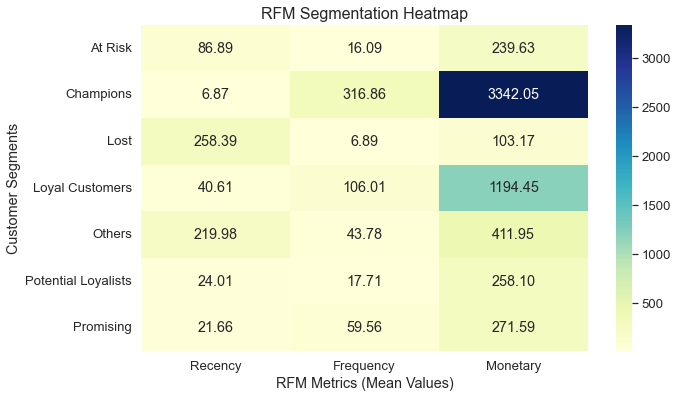

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(
    segment_matrix.set_index('Segment').drop('CustomerID', axis=1), 
    annot=True, fmt=".2f", cmap="YlGnBu", cbar=True
)

plt.title("RFM Segmentation Heatmap", fontsize=16)
plt.ylabel("Customer Segments")
plt.xlabel("RFM Metrics (Mean Values)")
plt.show()

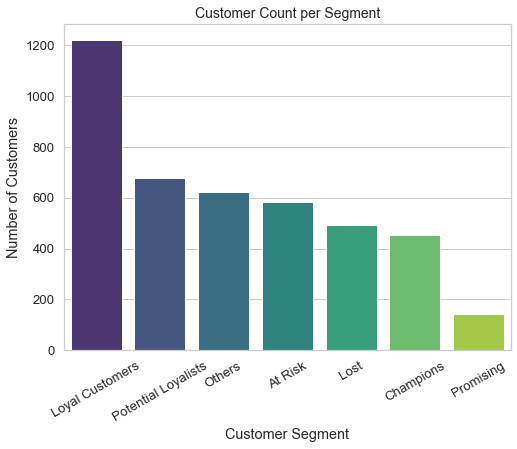

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=rfm['Segment'].value_counts().index,
    y=rfm['Segment'].value_counts().values,
    palette="viridis"
)
plt.title("Customer Count per Segment", fontsize=14)
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.show()